## Part 1: Import, Load Data.

In [11]:
#import libriaries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [12]:
# read data from '.csv' file
df = pd.read_csv('gender.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [14]:
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


### Rename Columns

In [15]:
# columns rename
df.columns = ['color', 'music', 'beverage', 'softdrink', 'gender']
df.columns

Index(['color', 'music', 'beverage', 'softdrink', 'gender'], dtype='object')

### Columns visualisation


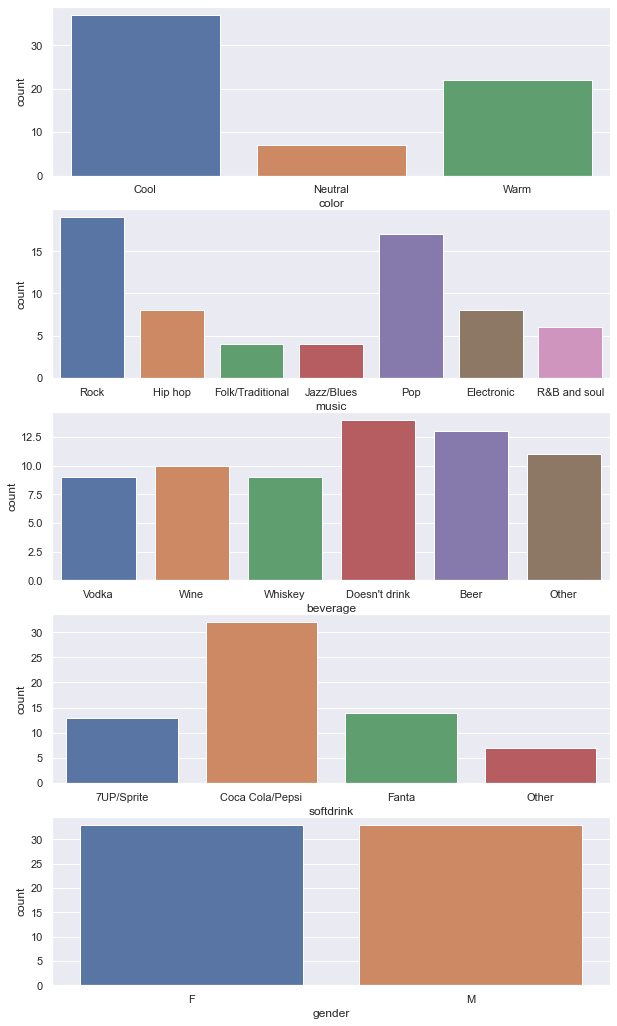

In [16]:
# columns visualisation
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10,18))
for i in range(len(df.columns)):
    sns.countplot(data=df, x=df.iloc[:,i],ax=axes[i])

### 'gender' attribute value counts

In [17]:
# 'gender' value counts 
df['gender'].value_counts()

M    33
F    33
Name: gender, dtype: int64

### Encode the Data

In [18]:
# label encoding
le_color = LabelEncoder()
data = df
data['color'] = le_color.fit_transform(df.color.values)
le_music = LabelEncoder()
data['music'] = le_music.fit_transform(df.music.values)
le_beverage = LabelEncoder()
data['beverage'] = le_beverage.fit_transform(df.beverage.values)
le_softdrink = LabelEncoder()
data['softdrink'] = le_softdrink.fit_transform(df.softdrink.values)
le_gender = LabelEncoder()
data['gender'] = le_gender.fit_transform(df.gender.values)
data.head()

,color,music,beverage,softdrink,gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0


## Part 3: Data Wrangling and Transformation.

### Creating datasets for ML part

In [19]:
# set 'X' for features' and y' for the target ('gender').
y = data['gender']
X = data.drop(['gender'],axis=1)

### 'Train\Test' split

In [20]:
# 'Train\Test' splitting method
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

## Part 4: Machine Learning.

### Build, train and evaluate model

### Logistic Regression

In [22]:
# Logistic Regression model
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

In [23]:
# LR predictions
LR_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0])

## Visualisation of predictions

In [24]:
# visual comparison between Actual 'Gender' and Predicted 'Gender'
actualvspredicted = pd.DataFrame({"Actual Gender":y_test,"LR Predicted Gender":LR_pred})
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

,Actual Gender,LR Predicted Gender
45,1,1
28,0,1
29,0,1
55,1,1
63,1,1
31,0,0
51,1,0
46,1,0
34,1,1
4,0,0


### Classification report

In [25]:
# classification report of LR model
print("LR Classification Report: \n", classification_report(y_test, LR_pred, digits = 6))

LR Classification Report: 
               precision    recall  f1-score   support

           0   0.636364  0.777778  0.700000         9
           1   0.777778  0.636364  0.700000        11

    accuracy                       0.700000        20
   macro avg   0.707071  0.707071  0.700000        20
weighted avg   0.714141  0.700000  0.700000        20



### Confusion matrix

LR Confusion Matrix


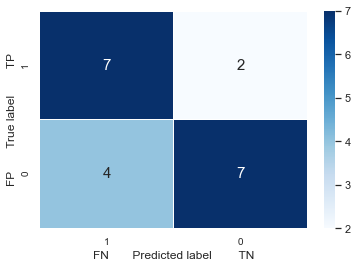

In [26]:
# confusion matrix of LR model
LR_confusion_mx = confusion_matrix(y_test, LR_pred)
print('LR Confusion Matrix')

# visualisation
ax = plt.subplot()
sns.heatmap(LR_confusion_mx, annot = True, fmt = 'd', cmap = 'Blues', ax = ax, linewidths = 0.5, annot_kws = {'size': 15})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '0'], fontsize = 10)
ax.yaxis.set_ticklabels(['1', '0'], fontsize = 10)
plt.show()
print()

In [27]:
# ROC-AUC score of LR model
roc_auc_score(LR_pred, y_test)

0.7070707070707071